# Pandas Exercises
source: https://www.machinelearningplus.com/python/101-pandas-exercises-python/

---

#### 1. How to import pandas and check the version?

In [1]:
import pandas as pd
import numpy as np   # also import NumPy for later
pd.__version__

'1.3.4'

In [3]:
pd.show_versions(as_json=False)   # Provide useful information, important for bug reports.


INSTALLED VERSIONS
------------------
commit           : 945c9ed766a61c7d2c0a7cbb251b6edebf9cb7d5
python           : 3.7.1.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19041
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 1.3.4
numpy            : 1.21.5
pytz             : 2018.7
dateutil         : 2.7.5
pip              : 18.1
setuptools       : 46.1.3
Cython           : 0.29.2
pytest           : 4.0.2
hypothesis       : None
sphinx           : 1.8.2
blosc            : None
feather          : None
xlsxwriter       : 1.1.2
lxml.etree       : 4.2.5
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.10
IPython          : 7.2.0
pandas_datareader: None
bs4              : 4.6.3
bottleneck       : 1.2.1
fsspec           : No

#### 2. How to create a series from a list, numpy array and dict?

In [10]:
import numpy as np
mylist = list('abcdefghijklmnopqrstuvwxyz')
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))

In [15]:
# pd.Series(): creates one-dimensional ndarray with axis labels
ser1 = pd.Series(mylist)
ser1.head(3)

0    a
1    b
2    c
dtype: object

In [16]:
ser2 = pd.Series(myarr)
ser2.head(3)

0    0
1    1
2    2
dtype: int32

In [17]:
ser3 = pd.Series(mydict)   # puts keys (=mylist) as index and values (=myarr) as values
ser3.head(3)

a    0
b    1
c    2
dtype: int32

#### 3. How to convert the index of a series into a column of a dataframe?

In [32]:
df = ser3.reset_index()  # convert index into column > automatically makes a dataframe
df.head(3)

,index,0
0,a,0
1,b,1
2,c,2


In [38]:
df2 = ser3.to_frame().reset_index()
df.equals(df2)

True

In [31]:
ser3.to_frame().head(3)  # only convert series to dataframe (and keeps the index as an index)

,0
a,0
b,1
c,2


#### 4. How to combine many series to form a dataframe?

In [49]:
# solution 1:
df = pd.concat([ser1, ser2], axis=1)
df.head(3)

,0,1
0,a,0
1,b,1
2,c,2


In [50]:
# solution 2:
df = pd.DataFrame({'col1': ser1, 'col2': ser2})
df.head(3)

,col1,col2
0,a,0
1,b,1
2,c,2


#### 5a. How to assign name to the series?

In [59]:
ser = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))
ser.name = 'alphabets'
ser.head(3)

0    a
1    b
2    c
Name: alphabets, dtype: object

#### 5b. How to assign name to the series’ index?

In [62]:
ser.index.name = 'idx'
ser.head(3)

idx
0    a
1    b
2    c
Name: alphabets, dtype: object

#### 6. How to get the items of series A not present in series B?

In [70]:
# From ser1 remove items present in ser2.
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])
ser1[~ser1.isin(ser2)]

0    1
1    2
2    3
dtype: int64

In [71]:
ser1.isin(ser2)   # Whether elements in Series are contained in `values`.

0    False
1    False
2    False
3     True
4     True
dtype: bool

#### 7. How to get the items not common to both series A and series B?

In [112]:
# Get all items of ser1 and ser2 not common to both. 
# KC solution:
ser12 = pd.concat([ser1, ser2])
ser12[~ser12.isin(ser1) + ~ser12.isin(ser2)] # all items that are not in ser1 (but ser2) and not in ser2 (but ser1)

0    1
1    2
2    3
2    6
3    7
4    8
dtype: int64

In [96]:
# alternative solution with NumPy:
ser_u = pd.Series(np.union1d(ser1, ser2))       # union (4-5)
ser_i = pd.Series(np.intersect1d(ser1, ser2))   # intersect (1-8) 

ser_u[~ser_u.isin(ser_i)]

0    1
1    2
2    3
5    6
6    7
7    8
dtype: int64

In [94]:
np.union1d(ser1, ser2)

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [95]:
np.intersect1d(ser1, ser2)

array([4, 5], dtype=int64)

#### 8. How to get the minimum, 25th percentile, median, 75th, and max of a numeric series?

In [135]:
state = np.random.RandomState(100)
ser = pd.Series(np.random.normal(10, 5, 25))

np.percentile(ser, q=[0, 25, 50, 75, 100])

array([ 0.47007443,  7.25866004,  9.41580208, 13.38174096, 24.50544687])

In [136]:
ser.describe()[3:]

min     0.470074
25%     7.258660
50%     9.415802
75%    13.381741
max    24.505447
dtype: float64

#### 9. How to get frequency counts of unique items of a series?

In [165]:
# Calculte the frequency counts of each unique value in ser.
ser = pd.Series(np.take(list('abcdefgh'), np.random.randint(8, size=30)))
ser.value_counts()

d    8
g    7
a    5
h    3
b    2
f    2
e    2
c    1
dtype: int64

In [166]:
np.take(a=['a','b','c'], indices=np.random.randint(3, size=5)) # take elements from an array a along an axis 

array(['b', 'b', 'c', 'a', 'a'], dtype='<U1')

#### 10. How to keep only top 2 most frequent values as it is and replace everything else as ‘Other’?

In [193]:
# From ser, keep the top 2 most frequent items as it is and replace everything else as ‘Other’.
np.random.seed(42) #RandomState(100)
ser = pd.Series(np.random.randint(1, 5, [12]))
ser

0     3
1     4
2     1
3     3
4     3
5     4
6     1
7     1
8     3
9     2
10    3
11    3
dtype: int32

In [191]:
# top 2 most frequent values
ser.value_counts()[:2].index

Int64Index([3, 1], dtype='int64')

In [192]:
ser[~ser.isin(ser.value_counts()[:2].index)] = 'Other'
ser

0         3
1     Other
2         1
3         3
4         3
5     Other
6         1
7         1
8         3
9     Other
10        3
11        3
dtype: object

#### 11. How to bin a numeric series to 10 groups of equal size?

In [203]:
# Bin the series ser into 10 equal deciles and replace the values with the bin name.
ser = pd.Series(np.random.random(20))
pd.qcut(ser, q=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.],     # Quantile-based discretization function.
        labels=['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th']).head()

0    2nd
1    5th
2    1st
3    9th
4    4th
dtype: category
Categories (10, object): ['1st' < '2nd' < '3rd' < '4th' ... '7th' < '8th' < '9th' < '10th']

In [212]:
[str(n) + 'th' for n in list(range(4,11))]

['4th', '5th', '6th', '7th', '8th', '9th', '10th']

#### 12. How to convert a numpy array to a dataframe of given shape?

In [7]:
# Reshape the series ser into a dataframe with 7 rows and 5 columns.
ser = pd.Series(np.random.randint(1, 10, 35))
df = pd.DataFrame(ser.values.reshape(7,5))
df

,0,1,2,3,4
0,2,5,5,4,2
1,8,3,7,2,8
2,3,8,7,6,1
3,2,5,4,2,2
4,9,4,6,4,2
5,1,8,2,6,9
6,5,2,6,8,7


#### 13. How to find the positions of numbers that are multiples of 3 from a series?

In [22]:
ser = pd.Series(np.random.randint(1, 10, 7))
np.argwhere((ser % 3 == 0).values)  # Find the indices of array elements that are non-zero, grouped by element.
# np.argwhere(ser % 3 == 0)         # gives ValueError: Length of values (1) does not match length of index (7)

array([[6]], dtype=int64)

In [34]:
# CAVE: np.argwhere() does NOT work with series as input, only with series.values as input 
a = ser % 3 == 0    # is a pd.Series (pandas.core.series.Series)
av = a.values       # is a np.ndarray (numpy.ndarray)
a, av

(0    False
 1    False
 2    False
 3    False
 4    False
 5    False
 6     True
 dtype: bool, array([False, False, False, False, False, False,  True]))

#### 14. How to extract items at given positions from a series?

In [43]:
ser.loc[pos]

0     a
4     e
8     i
14    o
20    u
dtype: object

In [44]:
# From ser, extract the items at positions in list pos.
ser = pd.Series(list('abcdefghijklmnopqrstuvwxyz'))
pos = [0, 4, 8, 14, 20]

print(ser[pos])        # normal indexing
print(ser.iloc[pos])   # location-based (positional) indexing with iloc
print(ser.loc[pos])    # label-based indexing with loc
print(ser.take(pos))   # Return the elements in the given *positional* indices along an axis.
# see for differences between iloc[] and take(): 
# https://stackoverflow.com/questions/62252662/what-is-the-difference-between-pandas-df-take-and-df-iloc

0     a
4     e
8     i
14    o
20    u
dtype: object
0     a
4     e
8     i
14    o
20    u
dtype: object
0     a
4     e
8     i
14    o
20    u
dtype: object
0     a
4     e
8     i
14    o
20    u
dtype: object


#### 15. How to stack two series vertically and horizontally ?

In [52]:
# Stack ser1 and ser2 vertically and horizontally (to form a dataframe). 
ser1 = pd.Series(range(5))
ser2 = pd.Series(list('abcde'))

In [51]:
# stack vertically > forms a longer series
pd.concat([ser1, ser2], axis=0)    # option 1: with pd.concat()
ser1.append(ser2)                  # option 2: with series.append()

0    0
1    1
2    2
3    3
4    4
0    a
1    b
2    c
3    d
4    e
dtype: object

In [53]:
pd.concat([ser1, ser2], axis=1)   # stack horizontally > forms a dataframe

,0,1
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


#### 16. How to get the positions of items of series A in another series B?

In [54]:
# Get the positions of items of ser2 in ser1 as a list.
ser1 = pd.Series([10, 9, 6, 5, 3, 1, 12, 8, 13])
ser2 = pd.Series([1, 3, 10, 13])

In [92]:
# solution 1
[np.where(i == ser1)[0].tolist()[0] for i in ser2]

[5, 4, 0, 8]

In [93]:
# solution 2
[pd.Index(ser1).get_loc(i) for i in ser2]

[5, 4, 0, 8]

In [76]:
# solution 3 > but not sorted as in ser 2
np.argwhere((ser1.isin(ser2)).values).flatten().tolist()

[0, 4, 5, 8]

In [61]:
(ser1.isin(ser2)).values

array([ True, False, False, False,  True,  True, False, False,  True])

#### 17. How to compute the mean squared error on a truth and predicted series?

In [94]:
truth = pd.Series(range(10))
pred = pd.Series(range(10)) + np.random.random(10)

In [102]:
np.mean(np.square(truth - pred))

0.41251362227897237

In [103]:
np.mean((truth - pred)**2)

0.41251362227897237

#### 18. How to convert the first character of each element in a series to uppercase?

In [2]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])
ser

0     how
1      to
2    kick
3    ass?
dtype: object

In [3]:
# KC solution 1a:
ser.str.capitalize()   # Convert strings in the Series/Index to be capitalized.

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [4]:
# KC solution 1b:
ser.str.title()        # Convert strings in the Series/Index to titlecase.

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [143]:
# KC solution 2a:
ser.apply(str.capitalize)

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [145]:
# KC solution 2b:
def my_func(x):
    return x.capitalize()

ser.apply(my_func)   # apply does not work with input "capitalize" directly, only with str.capitalize (see above)

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [147]:
# KC solution 3:
pd.Series([i.capitalize() for i in ser])
pd.Series([i.title() for i in ser])

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [149]:
# other solution 1:
ser.map(lambda x: x.title())

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [151]:
# other solution 2:
ser.map(lambda x: x[0].upper() + x[1:])

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [153]:
# note: all solutions above are not INPLACE, hence ser is not changed
ser

0     how
1      to
2    kick
3    ass?
dtype: object

#### 19. How to calculate the number of characters in each word in a series?

In [6]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])

In [156]:
# solution 1: with list comprehension
[len(i) for i in ser]

[3, 2, 4, 4]

In [7]:
# solution 2: with str.len()
ser.str.len()

0    3
1    2
2    4
3    4
dtype: int64

In [157]:
# solution 3: with apply
ser.apply(len)

0    3
1    2
2    4
3    4
dtype: int64

In [161]:
# solution 4a: with map
ser.map(len)

0    3
1    2
2    4
3    4
dtype: int64

In [162]:
# solution 4b: with map
ser.map(lambda x: len(x))

0    3
1    2
2    4
3    4
dtype: int64

#### 20. How to compute difference of differences between consequtive numbers of a series?

In [169]:
ser = pd.Series([1, 3, 6, 10, 15, 21, 27, 35])

In [170]:
# differences
ser.diff().tolist()

[nan, 2.0, 3.0, 4.0, 5.0, 6.0, 6.0, 8.0]

In [171]:
# differences of differences
ser.diff().diff().tolist()

[nan, nan, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0]

#### 21. How to convert a series of date-strings to a timeseries?

In [172]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])
ser

0         01 Jan 2010
1          02-02-2011
2            20120303
3          2013/04/04
4          2014-05-05
5    2015-06-06T12:20
dtype: object

In [184]:
# solution 1: better
pd.to_datetime(ser)

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]

In [183]:
# solution 2:
from dateutil.parser import parse    # Parse a timestring in one of the supported formats
ser.map(lambda x: parse(x))

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]

#### 22. How to get the day of month, week number, day of year and day of week from a series of date strings?

In [185]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])
ser

0         01 Jan 2010
1          02-02-2011
2            20120303
3          2013/04/04
4          2014-05-05
5    2015-06-06T12:20
dtype: object

In [210]:
# day of month
ser_ts = pd.to_datetime(ser)
ser_ts.dt.day.tolist()          # or: [x.day for x in ser_ts]

[1, 2, 3, 4, 5, 6]

In [218]:
# week number: with .week or .weekofyear
ser_ts.dt.week.tolist()         # or: [x.week for x in ser_ts]

[53, 5, 9, 14, 19, 23]

In [212]:
# day num of year: with .dayofyear or .day_of_year
ser_ts.dt.dayofyear.tolist()    # or: [x.dayofyear for x in ser_ts] 

[1, 33, 63, 94, 125, 157]

In [223]:
# day of week: with .day_name
ser_ts.dt.day_name().tolist()   # or: [x.day_name() for x in ser_ts]

['Friday', 'Wednesday', 'Saturday', 'Thursday', 'Monday', 'Saturday']

#### 23. How to convert year-month string to dates corresponding to the 4th day of the month?

In [8]:
ser = pd.Series(['Jan 2010', 'Feb 2011', 'Mar 2012'])
ser

0    Jan 2010
1    Feb 2011
2    Mar 2012
dtype: object

In [9]:
# solution 1:
pd.to_datetime(ser) + pd.DateOffset(days=3)

0   2010-01-04
1   2011-02-04
2   2012-03-04
dtype: datetime64[ns]

In [259]:
# solution 2:
ser.map(lambda x: parse('04 ' + x))

0   2010-01-04
1   2011-02-04
2   2012-03-04
dtype: datetime64[ns]

In [244]:
# solution 3: see https://stackoverflow.com/questions/28888730/pandas-change-day
ser_ts = pd.to_datetime(ser)   # or ser.map(lambda x: parse(x))
ser_ts.apply(lambda x: x.replace(day=4))

0   2010-01-04
1   2011-02-04
2   2012-03-04
dtype: datetime64[ns]

In [260]:
# solution 4: 
# Construct date string by hand with date as 4
ser_datestr = ser_ts.dt.year.astype('str') + '-' + ser_ts.dt.month.astype('str') + '-' + '04'
# Format it.
[parse(i).strftime('%Y-%m-%d') for i in ser_datestr]

['2010-01-04', '2011-02-04', '2012-03-04']

#### 24. How to filter words that contain at least 2 vowels from a series?

In [10]:
ser = pd.Series(['Apple', 'Orange', 'Plan', 'Python', 'Money'])
ser.map(lambda x: 'aeiou' in x)

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [275]:
# solution 1: see https://stackoverflow.com/questions/49234374/
mask = ser.str.lower().str.count(r'[aeiou]') >= 2
ser[mask]

0     Apple
1    Orange
4     Money
dtype: object

In [11]:
# solution 2:
ser.loc[ser.str.lower().map(lambda x: len(set(x).intersection(set('aeiou')))) > 1]  # loc[] also takes Booleans

0     Apple
1    Orange
4     Money
dtype: object

In [13]:
set('Apple')

{'A', 'e', 'l', 'p'}

In [14]:
set('Apple').intersection(set('aeiou'))

{'e'}

In [16]:
len(set('Apple').intersection(set('aeiou'))) > 1

False

In [281]:
# solution 3:
from collections import Counter
mask = ser.map(lambda x: sum([Counter(x.lower()).get(i, 0) for i in list('aeiou')]) >= 2)
ser[mask]

0     Apple
1    Orange
4     Money
dtype: object

In [276]:
[i for i in list('aeiou')]

['a', 'e', 'i', 'o', 'u']

In [282]:
[Counter('apple').get(i, 0) for i in list('aeiou')]  # Counter.get > Return the value for key if key is in dict

[1, 1, 0, 0, 0]

In [283]:
sum([Counter('apple').get(i, 0) for i in list('aeiou')])

2

#### 25. How to filter valid emails from a series?

In [25]:
# The regex pattern for valid emails is provided as reference.
emails = pd.Series(['buying books at amazom.com', 'rameses@egypt.com', 'matt@t.co', 'narendra@modi.com'])
pattern ='[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\\.[A-Za-z]{2,4}'

In [26]:
# Solution 1a (as series of strings) - with str.match()
mask = emails.str.match(pattern)
emails[mask]

1    rameses@egypt.com
2            matt@t.co
3    narendra@modi.com
dtype: object

In [27]:
# Solution 1b (as series of strings) - with re.match(pattern, string)
# tries to apply the pattern at the start of the string, returning a Match object, or None if no match was found.

import re
mask = emails.map(lambda x: bool(re.match(pattern, x)))   # input: (pattern, string), output: Match object
emails[mask]

1    rameses@egypt.com
2            matt@t.co
3    narendra@modi.com
dtype: object

In [28]:
# Cave: re.match() returns a Match object, not a Boolean
re.match('hi','hiho'), bool(re.match('hi','hiho'))

(<re.Match object; span=(0, 2), match='hi'>, True)

In [29]:
# Solution 2 (as series of list)
# str.finall(): finds all occurrences of pattern or regular expression in the Series/Index.
emails.str.findall(pat=pattern, flags=re.IGNORECASE)

0                     []
1    [rameses@egypt.com]
2            [matt@t.co]
3    [narendra@modi.com]
dtype: object

In [30]:
# Solution 3 (as list)
[x[0] for x in [re.findall(pattern, email) for email in emails] if len(x) > 0]

['rameses@egypt.com', 'matt@t.co', 'narendra@modi.com']

In [31]:
# inner list comprehension: > then take first element of each non-empty list to make the final list
[re.findall(pattern, email) for email in emails]

[[], ['rameses@egypt.com'], ['matt@t.co'], ['narendra@modi.com']]

In [34]:
# Solution 4: by filtering emails turned into indices
pd.Series(emails.reindex(emails).filter(regex=pattern).index)

0    rameses@egypt.com
1            matt@t.co
2    narendra@modi.com
dtype: object

In [35]:
emails.reindex(emails)   # Conform Series to new index with optional filling logic.

buying books at amazom.com    NaN
rameses@egypt.com             NaN
matt@t.co                     NaN
narendra@modi.com             NaN
dtype: object

In [36]:
emails.reindex(emails).filter(regex=pattern)  
# Subset the dataframe rows or columns according to the specified index labels.
# Note that this routine does not filter a dataframe on its contents. 
# The filter is applied to the labels of the index.
# axis=None > By default this is the info axis, i.e. 'index' for Series, 'columns' for DataFrame.

rameses@egypt.com    NaN
matt@t.co            NaN
narendra@modi.com    NaN
dtype: object

In [37]:
emails.reindex(emails).filter(regex=pattern).index

Index(['rameses@egypt.com', 'matt@t.co', 'narendra@modi.com'], dtype='object')

#### 26. How to get the mean of a series grouped by another series?

In [43]:
# Compute the mean of weights of each fruit.
fruit = pd.Series(np.random.choice(['apple', 'banana', 'carrot'], 10))
weights = pd.Series(np.linspace(1, 10, 10))

print(fruit.tolist())
print(weights.tolist())

['apple', 'carrot', 'banana', 'apple', 'carrot', 'carrot', 'apple', 'carrot', 'apple', 'banana']
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


In [44]:
weights.groupby(fruit).mean()

apple     5.25
banana    6.50
carrot    5.25
dtype: float64

In [46]:
[weights[fruit=='apple'].mean(),
weights[fruit=='banana'].mean(),
weights[fruit=='carrot'].mean()]

[5.25, 6.5, 5.25]

#### 27. How to compute the euclidean distance between two series?

In [54]:
# Compute the euclidean distance between series (points) p and q, without using a packaged formula.
p = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
q = pd.Series([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])


18.16590212458495

In [61]:
# Solution without using NumPy's sqrt():
sum((p - q)**2)**.5

18.16590212458495

In [62]:
# Solution using NumPy's sqrt():
np.sqrt(sum((p - q)**2))

18.16590212458495

In [66]:
# Solution using NumPy's norm():
np.linalg.norm(p-q, ord=None)      # Matrix or vector norm, returns L2 norm if ord=None (default) or ord=2

18.16590212458495

#### 28. How to find all the local maxima (or peaks) in a numeric series?

In [38]:
# Get the positions of peaks (values surrounded by smaller values on both sides) in ser.
ser = pd.Series([2, 10, 3, 4, 9, 10, 2, 7, 3])

In [98]:
# Solution 1:
dd = np.diff(np.sign(np.diff(ser)))    # dd has -2 if numbers on both sides smaller, i.e. if d=([1, -1])
peak_locs = np.where(dd == -2)[0] + 1  # add +1 index to fetch the correct position
peak_locs

array([1, 5, 7], dtype=int64)

In [99]:
np.diff(ser), np.sign(np.diff(ser)), np.diff(np.sign(np.diff(ser)))

(array([ 8, -7,  1,  5,  1, -8,  5, -4], dtype=int64),
 array([ 1, -1,  1,  1,  1, -1,  1, -1], dtype=int64),
 array([-2,  2,  0,  0, -2,  2, -2], dtype=int64))

In [100]:
np.where(dd == -2), np.where(dd == -2)[0], np.where(dd == -2)[0] + 1

((array([0, 4, 6], dtype=int64),),
 array([0, 4, 6], dtype=int64),
 array([1, 5, 7], dtype=int64))

In [101]:
# Solution 2: see https://stackoverflow.com/questions/48023982/pandas-finding-local-max-and-min
ser[(ser.shift(1) < ser) & (ser.shift(-1) < ser)]   # shift index by desired number (one forward & one backward)

1    10
5    10
7     7
dtype: int64

In [102]:
ser[(ser.shift(1) < ser) & (ser.shift(-1) < ser)].index

Int64Index([1, 5, 7], dtype='int64')

In [103]:
ser.shift(1)

0     NaN
1     2.0
2    10.0
3     3.0
4     4.0
5     9.0
6    10.0
7     2.0
8     7.0
dtype: float64

In [40]:
# Solution 3:
ser.loc[(ser.diff() > 0) & (ser.diff(-1) > 0)] #.index.to_list()

1    10
5    10
7     7
dtype: int64

In [48]:
print(ser.tolist())
print(ser.diff().tolist())
print(ser.diff(periods=-1).tolist()) # periods : int, default 1
                                     # Periods to shift for calculating difference, accepts negative values.

[2, 10, 3, 4, 9, 10, 2, 7, 3]
[nan, 8.0, -7.0, 1.0, 5.0, 1.0, -8.0, 5.0, -4.0]
[-8.0, 7.0, -1.0, -5.0, -1.0, 8.0, -5.0, 4.0, nan]


#### 29. How to replace missing spaces in a string with the least frequent character?

In [49]:
# Replace the spaces in my_str with the least frequent character.
my_str = 'dbc deb abed gade'

In [52]:
# Solution 0: use Counter
from collections import Counter
my_str.replace(' ', Counter(my_str.replace(' ', '')).most_common()[-1][0])

'dbcgdebgabedggade'

In [53]:
my_str.replace(' ', '')

'dbcdebabedgade'

In [54]:
Counter(my_str.replace(' ', '')).most_common()

[('d', 4), ('b', 3), ('e', 3), ('a', 2), ('c', 1), ('g', 1)]

In [56]:
Counter(my_str.replace(' ', '')).most_common()[-1][0]

'g'

In [164]:
# Solution: first geht count for each letter
ser = pd.Series(list(my_str))
freq = ser.value_counts().drop(index=' ')  # delete row with whitespace as index
freq

d    4
b    3
e    3
a    2
c    1
g    1
dtype: int64

In [173]:
# then extract the least frequent character
least_freq = freq.index[-1]  # get last index (minimum count)
least_freq

'g'

In [176]:
# then replace the whitespace in the original string with that character
my_str.replace(' ', least_freq)

'dbcgdebgabedggade'

In [177]:
# alternative for last step: replace whitespace in the pandas series, then join series elements into a string
"".join(ser.replace(' ', least_freq))

'dbcgdebgabedggade'

#### 30. How to create a TimeSeries starting ‘2000-01-01’ and 10 weekends (saturdays) after that having random numbers as values?

In [186]:
pd.Series(data=np.random.randint(1,10,10), 
          index=pd.date_range("2000-01-01", periods=10, freq="W-SAT"))

2000-01-01    3
2000-01-08    5
2000-01-15    2
2000-01-22    4
2000-01-29    7
2000-02-05    5
2000-02-12    4
2000-02-19    7
2000-02-26    6
2000-03-04    4
Freq: W-SAT, dtype: int32

In [188]:
dti = pd.date_range("2000-01-01", periods=10, freq="W-SAT")
dti

DatetimeIndex(['2000-01-01', '2000-01-08', '2000-01-15', '2000-01-22',
               '2000-01-29', '2000-02-05', '2000-02-12', '2000-02-19',
               '2000-02-26', '2000-03-04'],
              dtype='datetime64[ns]', freq='W-SAT')

#### 31. How to fill an intermittent time series so all missing dates show up with values of previous non-missing date?

In [192]:
ser = pd.Series([1,10,3,np.nan], 
                index=pd.to_datetime(['2000-01-01', '2000-01-03', '2000-01-06', '2000-01-08']))
ser

2000-01-01     1.0
2000-01-03    10.0
2000-01-06     3.0
2000-01-08     NaN
dtype: float64

In [200]:
# Solution:
ser.resample('D').pad()    # same as .ffill() = fill with previous value
ser.resample('D').ffill()  # same as .pad() 

2000-01-01     1.0
2000-01-02     1.0
2000-01-03    10.0
2000-01-04    10.0
2000-01-05    10.0
2000-01-06     3.0
2000-01-07     3.0
2000-01-08     NaN
Freq: D, dtype: float64

In [201]:
# Alternatives:
ser.resample('D').bfill()  # fill with next value (backward fill)

2000-01-01     1.0
2000-01-02    10.0
2000-01-03    10.0
2000-01-04     3.0
2000-01-05     3.0
2000-01-06     3.0
2000-01-07     NaN
2000-01-08     NaN
Freq: D, dtype: float64

In [202]:
ser.resample('D').bfill().ffill()  # fill next else prev value

2000-01-01     1.0
2000-01-02    10.0
2000-01-03    10.0
2000-01-04     3.0
2000-01-05     3.0
2000-01-06     3.0
2000-01-07     3.0
2000-01-08     3.0
Freq: D, dtype: float64

In [203]:
# Other task: only fill NaN in original timeseries:
ser.fillna(method='pad')    # same as method='ffill'

2000-01-01     1.0
2000-01-03    10.0
2000-01-06     3.0
2000-01-08     3.0
dtype: float64

#### 32. How to compute the autocorrelations of a numeric series?

In [255]:
# Compute autocorrelations for the first 10 lags of ser. Find out which lag has the largest correlation.
ser = pd.Series(np.arange(20) + np.random.normal(1, 10, 20))
ser

0      5.093028
1    -12.167858
2     -1.959151
3     -0.962633
4      4.278274
5     14.750143
6     17.890959
7     15.505092
8      2.612650
9     11.719134
10    16.956827
11    -7.476910
12     1.476109
13    24.617322
14    33.955185
15    23.965465
16    32.126696
17    27.694454
18    20.978710
19    29.723609
dtype: float64

In [256]:
# use .autocorr() method, which computes the Pearson correlation between the Series and its shifted self.
ser.autocorr(lag=1)  # lag (default=1): number of lags to apply before performing autocorrelation

0.6399944853286706

In [257]:
# Solution:
autocorrs = [ser.autocorr(lag=i) for i in range(11)]   # use lag=0...10
autocorrs

[1.0,
 0.6399944853286706,
 0.3651967653045627,
 0.36302768804957763,
 0.2042666894319506,
 -0.01677245337412744,
 0.03882846700456044,
 0.3654271128445411,
 0.3601867957214222,
 0.6215934360057552,
 0.7863033445193117]

In [258]:
# which lag has the largest correlation > add index +1 because we drop lag=0 (which has correlation of 1.0)
lagmax = np.argmax(np.abs(autocorrs[1:])) + 1
lagmax

10

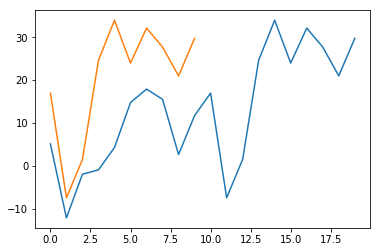

In [259]:
ser.plot();
ser[lagmax:].reset_index(drop=True).plot();

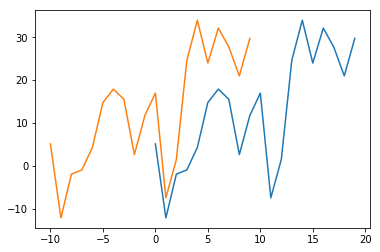

In [260]:
ser.plot();
ser.index -= lagmax
ser.plot();

#### 33. How to import only every nth row from a csv file to create a dataframe?

In [57]:
# Import every 50th row of BostonHousing dataset as a dataframe. 
data_url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'

In [58]:
# KC_solution: with skiprows and lambda function > does NOT need to load full dataset first
pd.read_csv(data_url, skiprows=lambda x: x % 50 != 0) # skips all rows that are not divisible without rest by 50

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.21977,0,6.91,0,0.448,5.602,62.0,6.0877,3,233,17.9,396.90,16.20,19.4
1,0.06860,0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
2,2.73397,0,19.58,0,0.871,5.597,94.9,1.5257,5,403,14.7,351.85,21.45,15.4
3,0.03150,95,1.47,0,0.403,6.975,15.3,7.6534,3,402,17.0,396.90,4.56,34.9
4,0.19073,22,5.86,0,0.431,6.718,17.5,7.8265,7,330,19.1,393.74,6.56,26.2
5,0.05561,70,2.24,0,0.400,7.041,10.0,7.8278,5,358,14.8,371.58,4.74,29.0
6,0.02899,40,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6
7,9.91655,0,18.10,0,0.693,5.852,77.8,1.5004,24,666,20.2,338.16,29.97,6.3
8,7.52601,0,18.10,0,0.713,6.417,98.3,2.1850,24,666,20.2,304.21,19.31,13.0
9,0.17783,0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5


In [63]:
# Solution 1: Use csv reader > does also NOT need to load full dataset first
# note that index is created new here (from 0-9) and that different rows are picked than with Solution 2a/b
import csv          
with open('data/BostonHousing.csv', 'r') as f:   # open csv file as f
    reader = csv.reader(f)  # The returned object is an iterator. Each iteration returns a row of the CSV file
    out = []                                     # create empty list to save rows
    for i, row in enumerate(reader):             # iterate over rows in file: i=0 (row 1), i=50 (row 51), ...
        if i%50 == 0:                            # append each 50th row to list
            out.append(row)

df2 = pd.DataFrame(out[1:], columns=out[0])      # turn list into dataframe, use 1st list element as col names
df2

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.21977,0,6.91,0,0.448,5.602,62,6.0877,3,233,17.9,396.9,16.2,19.4
1,0.0686,0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18,396.9,6.19,33.2
2,2.73397,0,19.58,0,0.871,5.597,94.9,1.5257,5,403,14.7,351.85,21.45,15.4
3,0.0315,95,1.47,0,0.403,6.975,15.3,7.6534,3,402,17,396.9,4.56,34.9
4,0.19073,22,5.86,0,0.431,6.718,17.5,7.8265,7,330,19.1,393.74,6.56,26.2
5,0.05561,70,2.24,0,0.4,7.041,10,7.8278,5,358,14.8,371.58,4.74,29
6,0.02899,40,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6
7,9.91655,0,18.1,0,0.693,5.852,77.8,1.5004,24,666,20.2,338.16,29.97,6.3
8,7.52601,0,18.1,0,0.713,6.417,98.3,2.185,24,666,20.2,304.21,19.31,13
9,0.17783,0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.1,17.5


In [64]:
print(out[0])  # 1st list element is 1st row (index 0) in file = header (col names)
print(out[1])  # 2nd list element is 51st row (index 50) in file

['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
['0.21977', '0', '6.91', '0', '0.448', '5.602', '62', '6.0877', '3', '233', '17.9', '396.9', '16.2', '19.4']


In [65]:
# Solution 2a: Use chunks and for-loop with .append() > needs to load full dataset first
df = pd.read_csv(data_url, chunksize=50)
df2 = pd.DataFrame()
for chunk in df:
    df2 = df2.append(chunk.iloc[0,:])   # append only first row of each 50-row-chunk
df2

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
100,0.14866,0.0,8.56,0.0,0.520,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42,27.5
150,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5
200,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
250,0.14030,22.0,5.86,0.0,0.431,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90,24.4
300,0.04417,70.0,2.24,0.0,0.400,6.871,47.4,7.8278,5.0,358.0,14.8,390.86,6.07,24.8
350,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98,22.9
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
450,6.71772,0.0,18.10,0.0,0.713,6.749,92.6,2.3236,24.0,666.0,20.2,0.32,17.44,13.4


In [66]:
# Solution 2b: Use chunks and list comprehension with .concat() > needs to load full dataset first
df = pd.read_csv(data_url, chunksize=50)
df2 = pd.concat([chunk.iloc[0] for chunk in df], axis=1)  # take 1st row of each chunk = series > cbind all series
df2 = df2.transpose()                                     # transpose cbinded series
df2

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
100,0.14866,0.0,8.56,0.0,0.520,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42,27.5
150,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5
200,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
250,0.14030,22.0,5.86,0.0,0.431,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90,24.4
300,0.04417,70.0,2.24,0.0,0.400,6.871,47.4,7.8278,5.0,358.0,14.8,390.86,6.07,24.8
350,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98,22.9
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
450,6.71772,0.0,18.10,0.0,0.713,6.749,92.6,2.3236,24.0,666.0,20.2,0.32,17.44,13.4


In [67]:
type(df)

pandas.io.parsers.readers.TextFileReader

In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 500
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     11 non-null     float64
 1   zn       11 non-null     float64
 2   indus    11 non-null     float64
 3   chas     11 non-null     float64
 4   nox      11 non-null     float64
 5   rm       11 non-null     float64
 6   age      11 non-null     float64
 7   dis      11 non-null     float64
 8   rad      11 non-null     float64
 9   tax      11 non-null     float64
 10  ptratio  11 non-null     float64
 11  b        11 non-null     float64
 12  lstat    11 non-null     float64
 13  medv     11 non-null     float64
dtypes: float64(14)
memory usage: 1.3 KB


#### 34. How to change column values when importing csv to a dataframe?

In [ ]:
# Import the boston housing dataset, but while importing change the 'medv' (median house value) column 
# so that values < 25 becomes ‘Low’ and > 25 becomes ‘High’.

In [81]:
# Solution 1a: Using converter parameter with lambda function
df = pd.read_csv(data_url, converters={'medv': lambda x: 'High' if float(x) > 25 else 'Low'})
df
# converters : dict, optional
#    Dict of functions for converting values in certain columns. Keys can either be integers or column labels.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,Low
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,Low
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,High
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,High
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,Low
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,Low
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,Low
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,Low


In [82]:
# Solution 1b: Using converter parameter with custom function (defined separately)

def medv_converter(value):
    if float(value) < 25:
        return 'Low'
    return 'High'
    
df = pd.read_csv(data_url, converters={'medv': medv_converter} )
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,Low
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,Low
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,High
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,High
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,Low
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,Low
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,Low
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,Low


In [83]:
# Solution 2: Using csv reader
import csv
with open('data/BostonHousing.csv', 'r') as f:
    reader = csv.reader(f)                                        # generate 'reader' iterable
    out = []
    for i, row in enumerate(reader):                              # loop over rows using 'reader' iterable
        if i > 0:                                                 # if not first row = header (col names)
            row[13] = 'High' if float(row[13]) > 25 else 'Low'    # convert 14th element in row
        out.append(row)
        
df = pd.DataFrame(out[1:], columns=out[0])
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,Low
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,Low
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,High
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,High
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21,391.99,9.67,Low
502,0.04527,0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21,396.9,9.08,Low
503,0.06076,0,11.93,0,0.573,6.976,91,2.1675,1,273,21,396.9,5.64,Low
504,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21,393.45,6.48,Low


#### 35. How to create a dataframe with rows as strides from a given series?

In [101]:
L = pd.Series(range(15))
L.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [105]:
def gen_strides(a, stride_len=5, window_len=5):  # stride_len=2, window_len=4
    n_strides = ((a.size-window_len)//stride_len) + 1
    return np.array([a[s:(s+window_len)] for s in np.arange(0, a.size, stride_len)[:n_strides]])

pd.DataFrame(gen_strides(L, stride_len=2, window_len=4))

,0,1,2,3
0,0,1,2,3
1,2,3,4,5
2,4,5,6,7
3,6,7,8,9
4,8,9,10,11
5,10,11,12,13


In [107]:
np.arange(0, L.size, 2)[:6]

array([ 0,  2,  4,  6,  8, 10])

#### 36. How to import only specified columns from a csv file?

In [109]:
# Import ‘crim’ and ‘medv’ columns of the BostonHousing dataset as a dataframe.
df = pd.read_csv(data_url, usecols=['crim', 'medv'])
df

# usecols : list-like or callable, optional (default = None)
#    Return a subset of the columns. If list-like, all elements must either be positional (i.e. integer indices
#    into the document columns) or strings that correspond to column names provided either by the user in `names`
#    or inferred from the document header row(s). Element order is ignored

,crim,medv
0,0.00632,24.0
1,0.02731,21.6
2,0.02729,34.7
3,0.03237,33.4
4,0.06905,36.2
...,...,...
501,0.06263,22.4
502,0.04527,20.6
503,0.06076,23.9
504,0.10959,22.0


#### 37. How to get the nrows, ncolumns, datatype, summary stats of each column of a dataframe? Also get the array and list equivalent.

In [112]:
# First get the Cars93 dataset. 
cars_url = 'https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv'
df = pd.read_csv(cars_url)
df.head(3)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90


In [120]:
# Get the number of rows and columns
print('number of rows:', df.shape[0], 'or', len(df))
print('number of cols:', df.shape[1])

number of rows: 93 or 93
number of cols: 27


In [123]:
# Get the datatype of each column of the dataset
df.dtypes

Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city              float64
MPG.highway           float64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower            float64
RPM                   float64
Rev.per.mile          float64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers            float64
Length                float64
Wheelbase             float64
Width                 float64
Turn.circle           float64
Rear.seat.room        float64
Luggage.room          float64
Weight                float64
Origin                 object
Make                   object
dtype: object

In [138]:
# how many columns under each dtype
df.dtypes.value_counts()             # is alternative "df.get_dtype_counts()" deprecated?

float64    18
object      9
dtype: int64

In [139]:
# Get the summary statistics 
df.describe()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,86.000000,91.000000,88.000000,84.000000,91.000000,91.000000,86.000000,90.000000,87.000000,85.000000,91.000000,89.000000,92.000000,87.000000,88.000000,89.000000,74.000000,86.000000
mean,17.118605,19.616484,21.459091,22.404762,29.065934,2.658242,144.000000,5276.666667,2355.000000,16.683529,5.076923,182.865169,103.956522,69.448276,38.954545,27.853933,13.986486,3104.593023
std,8.828290,9.724280,10.696563,5.841520,5.370293,1.045845,53.455204,605.554811,486.916616,3.375748,1.045953,14.792651,6.856317,3.778023,3.304157,3.018129,3.120824,600.129993
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.825000,12.350000,14.575000,18.000000,26.000000,1.800000,100.750000,4800.000000,2017.500000,14.500000,4.000000,174.000000,98.000000,67.000000,36.000000,26.000000,12.000000,2647.500000
50%,14.600000,17.700000,19.150000,21.000000,28.000000,2.300000,140.000000,5200.000000,2360.000000,16.500000,5.000000,181.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3085.000000
75%,20.250000,23.500000,24.825000,25.000000,31.000000,3.250000,170.000000,5787.500000,2565.000000,19.000000,6.000000,192.000000,110.000000,72.000000,42.000000,30.000000,16.000000,3567.500000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


In [143]:
# Also get the numpy array of the dataframe: 2 options
df.values      
df.to_numpy()

array([['Acura', 'Integra', 'Small', ..., 2705.0, 'non-USA',
        'Acura Integra'],
       [nan, 'Legend', 'Midsize', ..., 3560.0, 'non-USA', 'Acura Legend'],
       ['Audi', '90', 'Compact', ..., 3375.0, 'non-USA', 'Audi 90'],
       ...,
       ['Volkswagen', 'Corrado', 'Sporty', ..., 2810.0, 'non-USA',
        'Volkswagen Corrado'],
       ['Volvo', '240', 'Compact', ..., 2985.0, 'non-USA', 'Volvo 240'],
       [nan, '850', 'Midsize', ..., 3245.0, 'non-USA', 'Volvo 850']],
      dtype=object)

In [ ]:
# Get the list equivalent of the dataframe
df.values.tolist()

#### 38. How to extract the row and column number of a particular cell with given criterion?

The difference between `iat`/`iloc` vs `at`/`loc` is:
- `iat`/`iloc` accept row & column **indices** (numbers) or Boolean array. 
- `at`/`loc` accept **index** & column **labels** (names).


- use `iat`/`at` (instead of `iloc`/`loc`) if you only need to get or set a **SINGLE VALUE** in a DataFrame or Series.

In [58]:
# First get the Cars93 dataset. 
cars_url = 'https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv'
df = pd.read_csv(cars_url)
df.head(3)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90


**`loc[]`**: Access a **group** of rows and columns by **label(s)** or by **Boolean array.**

In [45]:
# Get manufacturer, model and type with highest Price using loc[]
df.loc[df.Price == df.Price.max(), ['Manufacturer', 'Model', 'Type']]  # or use: np.max(df.Price)

,Manufacturer,Model,Type
58,Mercedes-Benz,300E,Midsize


In [35]:
# alternative with .sort_values():
df.sort_values(by='Price', ascending=False).head(1)[['Manufacturer', 'Model', 'Type']]

,Manufacturer,Model,Type
58,Mercedes-Benz,300E,Midsize


In [46]:
# Get row and column number of the cell with the highest Price value
row, col = np.where(df.values == df.Price.max())  # or use: np.max(df.Price)
print(row, col)

[58] [4]


In [36]:
df.values == df.Price.max()

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [38]:
row, row[0]

(array([58], dtype=int64), 58)

**`iloc[]`**: Access a **group** of rows and columns by **integer position(s).**

In [41]:
# Get the highest price value by row/col index with iloc[]
df.iloc[row[0], col[0]]     # iloc[] = Purely integer-location based indexing for selection by position.    

61.9

**`iat[]`**: Access a **single value** for a row/column pair by **integer position.**

In [42]:
# Get the highest price value by row/col index with iat[]
df.iat[row[0], col[0]]      # Similar to iloc, in that both provide integer-based lookups.                             
                            # Use iat if you only need to get or set a SINGLE VALUE in a DataFrame or Series.

61.9

**`at[]`**: Access a **single value** for a row/column **label** pair.

In [44]:
# Get the highest price value by row index & col label with at[]
df.at[row[0], 'Price']      # Similar to loc, in that both provide label-based lookups. 
                            # Use at if you only need to get or set a SINGLE VALUE in a DataFrame or Series.

61.9

#### 39. How to rename a specific columns in a dataframe?

In [59]:
# Rename the column 'Type' as 'CarType' in df and replace the ‘.’ in column names with ‘_’.
df.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [61]:
# Solution 0: all in one line with df.rename() [twice in a row] and .str.replace()
df.rename(columns=dict(zip(df.columns, 
                           df.columns.str.replace('.', '_', regex=False)))).rename(columns = {'Type':'CarType'})

,Manufacturer,Model,CarType,Min_Price,Price,Max_Price,MPG_city,MPG_highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn_circle,Rear_seat_room,Luggage_room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17.0,21.0,None,Front,...,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21.0,30.0,None,Front,...,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18.0,25.0,None,Front,...,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21.0,28.0,Driver only,Rear,...,5.0,190.0,104.0,67.0,37.0,29.5,14.0,2985.0,non-USA,Volvo 240


In [64]:
df.rename(columns=dict(zip(df.columns, 
                           df.columns.str.replace('.', '_', regex=False)))).columns

Index(['Manufacturer', 'Model', 'Type', 'Min_Price', 'Price', 'Max_Price',
       'MPG_city', 'MPG_highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev_per_mile', 'Man_trans_avail',
       'Fuel_tank_capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn_circle', 'Rear_seat_room', 'Luggage_room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [65]:
# Solution Part 1: Rename the column 'Type' as 'CarType'
df.rename(mapper={'Type': 'CarType'}, axis=1,   # or use: columns=dict instead of mapper=dict, axis=1 (see below)
          inplace=True)                         # or use: df = df.rename(...) instead if inplace=True (see below)
df.columns

Index(['Manufacturer', 'Model', 'CarType', 'Min_Price', 'Price', 'Max_Price',
       'MPG_city', 'MPG_highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev_per_mile', 'Man_trans_avail',
       'Fuel_tank_capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn_circle', 'Rear_seat_room', 'Luggage_room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [67]:
# alternative 1
df = df.rename(columns={'Type': 'CarType'})
df.columns

Index(['Manufacturer', 'Model', 'CarType', 'Min_Price', 'Price', 'Max_Price',
       'MPG_city', 'MPG_highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev_per_mile', 'Man_trans_avail',
       'Fuel_tank_capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn_circle', 'Rear_seat_room', 'Luggage_room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [71]:
# alternative 2:
df.columns.values[2] = "CarType"
df.columns

Index(['Manufacturer', 'Model', 'CarType', 'Min_Price', 'Price', 'Max_Price',
       'MPG_city', 'MPG_highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev_per_mile', 'Man_trans_avail',
       'Fuel_tank_capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn_circle', 'Rear_seat_room', 'Luggage_room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [63]:
# Solution Part 2: Replace the ‘.’ in column names with ‘_’.
df.columns = df.columns.str.replace(pat='.', repl='_', # Replace each occurrence of pattern/regex in Series/Index.
                                   regex=False)        # prevent warning by setting regex=False (pat not a regex)
df.columns

Index(['Manufacturer', 'Model', 'CarType', 'Min_Price', 'Price', 'Max_Price',
       'MPG_city', 'MPG_highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev_per_mile', 'Man_trans_avail',
       'Fuel_tank_capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn_circle', 'Rear_seat_room', 'Luggage_room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [73]:
# alternative with map():
df.columns = df.columns.map(lambda x: x.replace('.', '_'))
df.columns

Index(['Manufacturer', 'Model', 'CarType', 'Min_Price', 'Price', 'Max_Price',
       'MPG_city', 'MPG_highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev_per_mile', 'Man_trans_avail',
       'Fuel_tank_capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn_circle', 'Rear_seat_room', 'Luggage_room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

#### 40. How to check if a dataframe has any missing values?

In [83]:
df.isnull().values.any()

True

#### 41. How to count the number of missing values in each column? Which column has the maximum number of missing values?

In [66]:
# Solution 1:
df.isnull().sum().idxmax()

'Luggage.room'

In [67]:
df.isnull().sum().sort_values(ascending=False)    # use default: sum(axis=0)

Luggage.room          19
MPG.city               9
Fuel.tank.capacity     8
DriveTrain             7
Horsepower             7
Min.Price              7
Weight                 7
Rev.per.mile           6
Width                  6
AirBags                6
Cylinders              5
Turn.circle            5
Max.Price              5
Man.trans.avail        5
Origin                 5
Length                 4
Rear.seat.room         4
Manufacturer           4
RPM                    3
Type                   3
Make                   3
Passengers             2
EngineSize             2
MPG.highway            2
Price                  2
Wheelbase              1
Model                  1
dtype: int64

In [109]:
# Solution 2:
n_missings_each_col = df.apply(lambda x: x.isnull().sum())
n_missings_each_col

Manufacturer           4
Model                  1
CarType                3
Min_Price              7
Price                  2
Max_Price              5
MPG_city               9
MPG_highway            2
AirBags                6
DriveTrain             7
Cylinders              5
EngineSize             2
Horsepower             7
RPM                    3
Rev_per_mile           6
Man_trans_avail        5
Fuel_tank_capacity     8
Passengers             2
Length                 4
Wheelbase              1
Width                  6
Turn_circle            5
Rear_seat_room         4
Luggage_room          19
Weight                 7
Origin                 5
Make                   3
dtype: int64

In [111]:
n_missings_each_col.index[n_missings_each_col.argmax()]

'Luggage_room'

In [94]:
# same results with df.isna() and df.isnull()
np.array_equal(df.isnull().sum(), 
               df.isna().sum())

True

In [112]:
# or use df.info() for summary of Non-Null values per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        89 non-null     object 
 1   Model               92 non-null     object 
 2   CarType             90 non-null     object 
 3   Min_Price           86 non-null     float64
 4   Price               91 non-null     float64
 5   Max_Price           88 non-null     float64
 6   MPG_city            84 non-null     float64
 7   MPG_highway         91 non-null     float64
 8   AirBags             87 non-null     object 
 9   DriveTrain          86 non-null     object 
 10  Cylinders           88 non-null     object 
 11  EngineSize          91 non-null     float64
 12  Horsepower          86 non-null     float64
 13  RPM                 90 non-null     float64
 14  Rev_per_mile        87 non-null     float64
 15  Man_trans_avail     88 non-null     object 
 16  Fuel_tank_

#### 42. How to replace missing values of multiple numeric columns with the mean?

In [148]:
# Replace missing values in Min.Price and Max.Price columns with their respective mean.

In [167]:
# first load original dataframe
df = cars_url = 'https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv'
df = pd.read_csv(cars_url)

In [168]:
# Solution 1: with apply
df_out = df[['Min.Price', 'Max.Price']] = df[['Min.Price', 'Max.Price']].apply(lambda x: x.fillna(x.mean()))
df_out.head()

,Min.Price,Max.Price
0,12.900000,18.800000
1,29.200000,38.700000
2,25.900000,32.300000
3,17.118605,44.600000
4,17.118605,21.459091


In [169]:
# Solution 2: without apply
df_out2 = df.loc[:,['Min.Price', 'Max.Price']].fillna(df.loc[:,['Min.Price', 'Max.Price']].mean())
df_out2.head()

,Min.Price,Max.Price
0,12.900000,18.800000
1,29.200000,38.700000
2,25.900000,32.300000
3,17.118605,44.600000
4,17.118605,21.459091


#### 43. How to use apply function on existing columns with global variables as additional arguments?

In [ ]:
# In df, use apply method to replace the missing values in Min.Price 
# with the column’s mean and those in Max.Price with the column’s median.

In [170]:
# first load original dataframe
df = cars_url = 'https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv'
df = pd.read_csv(cars_url)

In [182]:
# Solution with apply(..., args=...)
d = {'Min.Price': np.nanmean, 'Max.Price': np.nanmedian}   # store required functions as values in dict

df_out = df[['Min.Price', 'Max.Price']] = df[['Min.Price', 'Max.Price']].apply(   # apply to each column (axis=0)
    lambda x, d: x.fillna(value=d[x.name](x)), args=(d, ))  
  # use 'args' keyword in apply function: tuple
  #   Positional arguments to pass to `func` in addition to the array/series.
  #   here: use global variable d (dictionary) as additional argument

df_out.head()

,Min.Price,Max.Price
0,12.900000,18.80
1,29.200000,38.70
2,25.900000,32.30
3,17.118605,44.60
4,17.118605,19.15


In [183]:
f = d['Min.Price']   # d[key] returns a function stored in the dictionary d
f

<function numpy.nanmean(a, axis=None, dtype=None, out=None, keepdims=<no value>)>

In [187]:
f( [1,2,3] )   # this function can then be called (as usual) with an input in brackets

2.0

#### 44. How to select a specific column from a dataframe as a dataframe instead of a series?

In [188]:
# Get the first column (a) in df as a dataframe (rather than as a Series).
df = pd.DataFrame(np.arange(20).reshape(-1, 5), columns=list('abcde'))
df

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [217]:
# Solution 1: input col label (='a') or col index (=0) as a LIST instead of a single string/number
df[['a']]         
df.loc[:, ['a']]
df.iloc[:, [0]]

,a
0,0
1,5
2,10
3,15


In [220]:
# Solution 2: input RANGE of columns, even if this range contains only the single column
df.loc[:,:'a']  # instead of [:,'a']
df.iloc[:,:1]   # instead of [:,0]

,a
0,0
1,5
2,10
3,15


In [221]:
# Solution 3: convert returned series to dataframe
df.a.to_frame()

,a
0,0
1,5
2,10
3,15


In [222]:
# Whereas the following return a Series
df.a
df['a']
df.loc[:, 'a']
df.iloc[:, 0]

0     0
1     5
2    10
3    15
Name: a, dtype: int32

#### 45. How to change the order of columns of a dataframe?

In [282]:
# Input:
df = pd.DataFrame(np.arange(20).reshape(-1, 5), columns=list('abcde'))
df

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [283]:
# Part 1: In df, interchange columns 'a' and 'c'.
df[list('cbade')]    # or: df[['c','b','a','d','e']]

,c,b,a,d,e
0,2,1,0,3,4
1,7,6,5,8,9
2,12,11,10,13,14
3,17,16,15,18,19


In [285]:
# Part 2: Create a generic function to interchange two columns, without hardcoding column names.
# see also: https://stackoverflow.com/questions/25649429/how-to-swap-two-dataframe-columns

def switch_columns(df, col1, col2):
    colnames = df.columns.tolist()                            # or: df.columns.values, or: list(df.columns)
    i1, i2 = colnames.index(col1), colnames.index(col2)       # Return first index of value.
    # or: i1, i2 = np.where(colnames==col1), np.where(colnames==col2)
    colnames[i2], colnames[i1] = colnames[i1], colnames[i2]   # swap both columns simultaneously
    return df[colnames]

df1 = switch_columns(df, 'a', 'c')
df1

,c,b,a,d,e
0,2,1,0,3,4
1,7,6,5,8,9
2,12,11,10,13,14
3,17,16,15,18,19


In [286]:
# Part 3: Sort the columns in reverse alphabetical order, that is colume 'e' first through column 'a' last.
df[sorted(df.columns, reverse=True)]

,e,d,c,b,a
0,4,3,2,1,0
1,9,8,7,6,5
2,14,13,12,11,10
3,19,18,17,16,15


In [287]:
sorted(df.columns, reverse=True)

['e', 'd', 'c', 'b', 'a']

In [288]:
# alternative:
df.sort_index(axis=1, ascending=False, inplace=True)  # Sort object by labels (along an axis), axis=1 > sort cols
df

,e,d,c,b,a
0,4,3,2,1,0
1,9,8,7,6,5
2,14,13,12,11,10
3,19,18,17,16,15


#### 46. How to set the number of rows and columns displayed in the output?

In [85]:
# Input
df = pd.read_csv(cars_url)
df

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17.0,21.0,None,Front,...,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21.0,30.0,None,Front,...,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18.0,25.0,None,Front,...,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21.0,28.0,Driver only,Rear,...,5.0,190.0,104.0,67.0,37.0,29.5,14.0,2985.0,non-USA,Volvo 240


In [ ]:
# Show all available options
pd.describe_option()

In [95]:
# Show current display options
pd.options.display.max_rows, pd.options.display.max_columns

(60, 20)

In [87]:
# Change the pandas display settings on printing the dataframe df it shows a maximum of 10 rows and 10 columns.

# Solution 1: with simple assignment
pd.options.display.max_rows = 10
pd.options.display.max_columns = 10
df

,Manufacturer,Model,Type,Min.Price,Price,...,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,...,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,...,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,...,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,...,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,...,27.0,13.0,3640.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,...,34.0,NaN,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,...,31.5,14.0,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,...,26.0,15.0,2810.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,...,29.5,14.0,2985.0,non-USA,Volvo 240


In [100]:
# reset options to default
pd.reset_option("display.max_rows")     # or: pd.options.display.max_rows = None
pd.reset_option("display.max_columns")  # or: pd.options.display.max_columns = None

# Show current display options
pd.options.display.max_rows, pd.options.display.max_columns

(60, 20)

In [101]:
# Solution 2: with pd.set_option(option, value) > Sets the value of the specified option.
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 10)

# Show current display options
pd.options.display.max_rows, pd.options.display.max_columns

(10, 10)

In [102]:
# reset options to default
pd.reset_option("display.max_rows")     # or: pd.options.display.max_rows = None
pd.reset_option("display.max_columns")  # or: pd.options.display.max_columns = None

# Show current display options
pd.options.display.max_rows, pd.options.display.max_columns

(60, 20)

#### 47. How to format or suppress scientific notations in a pandas dataframe?

In [158]:
# Suppress scientific notations like ‘e-03’ in df and print upto 4 numbers after decimal.
df = pd.DataFrame(np.random.random(4)**10, columns=['random'])
df

,random
0,2.8779e-05
1,3.9542e-03
2,7.1065e-03
3,9.3556e-03


In [159]:
# Solution 1a: Assign display.float_format    (see also: https://stackoverflow.com/questions/21137150/)
pd.options.display.float_format = '{:.4f}'.format
df

,random
0,0.0000
1,0.0040
2,0.0071
3,0.0094


In [147]:
# reset option:
pd.reset_option('display.float_format')  # or: pd.options.display.float_format = None
df

,random
0,1.4907e-05
1,1.8496e-07
2,2.6705e-01
3,1.3192e-03


In [148]:
# Solution 1b: Use pd.set_option(option, value)
pd.set_option('display.float_format', '{:.4f}'.format)  
# or: pd.set_option('display.float_format', lambda x: '%.4f' % x)
df

,random
0,0.0000
1,0.0000
2,0.2670
3,0.0013


In [149]:
# reset option:
pd.reset_option('display.float_format')  # or: pd.options.display.float_format = None
df

,random
0,1.4907e-05
1,1.8496e-07
2,2.6705e-01
3,1.3192e-03


In [150]:
# Solution 3: Round to 4 decimal places (without changing pandas display options)
df1 = df.round(4)  # needs new assignment, as round() is not inplace
df1

,random
0,0.0000
1,0.0000
2,0.2670
3,0.0013


In [155]:
# Solution 4a: Use apply to change format (without changing pandas display options)
df.apply(lambda x: '%.4f' % x, axis=1) # Apply a function along an axis of the DataFrame. ==> returns Series!

0    0.0000
1    0.0000
2    0.2670
3    0.0013
dtype: object

In [156]:
# Solution 4b: Use applymap to change format (without changing pandas display options)
df.applymap(lambda x: '%.4f' % x)  # Apply a function to a Dataframe elementwise. ==> returns DataFrame!

,random
0,0.0000
1,0.0000
2,0.2670
3,0.0013


In [157]:
df

,random
0,1.4907e-05
1,1.8496e-07
2,2.6705e-01
3,1.3192e-03


#### 48. How to format all the values in a dataframe as percentages?

In [162]:
df = pd.DataFrame(np.random.random(4), columns=['random'])
df

,random
0,0.0098
1,0.8799
2,0.8372
3,0.5396


In [163]:
# Solution 1: Assign display.float_format
pd.options.display.float_format = '{:.2%}'.format
df
# use '{:.2%}' instead of '{:.2f}%' > converts correctly, automatically takes care of multiplication by 100

,random
0,0.98%
1,87.99%
2,83.72%
3,53.96%


In [164]:
# Reset option
pd.reset_option('float_format')
df

,random
0,0.0098
1,0.8799
2,0.8372
3,0.5396


In [165]:
# Solution 2: Use pd.set_option()
pd.set_option('display.float_format', '{:,.2%}'.format) 
df

,random
0,0.98%
1,87.99%
2,83.72%
3,53.96%


In [166]:
# Reset option
pd.reset_option('float_format')
df

,random
0,0.0098
1,0.8799
2,0.8372
3,0.5396


In [172]:
# Solution 3: Use applymap to change format (without changing pandas display options)
df.applymap(lambda x: '{:,.2%}'.format(x))   # note: not inplace

,random
0,0.98%
1,87.99%
2,83.72%
3,53.96%


In [173]:
df

,random
0,0.0098
1,0.8799
2,0.8372
3,0.5396


In [174]:
# Solution 4: use df.style.format(dict)  > see: https://stackoverflow.com/questions/23981601/
df1 = df.style.format({            # use dict as mapper: 
    'random': '{0:.2%}'.format,    # {column1_label: format1, column2_label: format2, ...}
})

df1

,random
0,0.98%
1,87.99%
2,83.72%
3,53.96%


#### 49. How to filter every nth row in a dataframe?

In [ ]:
# From df, filter the 'Manufacturer', 'Model' and 'Type' for every 20th row starting from 1st (row 0). 

In [185]:
# Solution 1: with slicing
df = pd.read_csv(cars_url)
df.iloc[::20, :][['Manufacturer', 'Model', 'Type']]

,Manufacturer,Model,Type
0,Acura,Integra,Small
20,Chrysler,LeBaron,Compact
40,Honda,Prelude,Sporty
60,Mercury,Cougar,Midsize
80,Subaru,Loyale,Small


In [186]:
# Solution 2: with Numpy arange()
df.loc[np.arange(0,len(df),20), ['Manufacturer', 'Model', 'Type']]

,Manufacturer,Model,Type
0,Acura,Integra,Small
20,Chrysler,LeBaron,Compact
40,Honda,Prelude,Sporty
60,Mercury,Cougar,Midsize
80,Subaru,Loyale,Small


In [192]:
# Solution 2: filter already when loading dataset with pd.read_csv(..., usecols=..., skiprows=...)
df = pd.read_csv(cars_url, 
                 usecols = ['Manufacturer', 'Model', 'Type'],
                 skiprows = lambda x: (x-1)%20 != 0 if x>0 else False)
df

,Manufacturer,Model,Type
0,Acura,Integra,Small
1,Chrysler,LeBaron,Compact
2,Honda,Prelude,Sporty
3,Mercury,Cougar,Midsize
4,Subaru,Loyale,Small


#### 50. How to create a primary key index by combining relevant columns?

In [225]:
# Input:
df = pd.read_csv(cars_url)

In [226]:
# Part 1: In df, Replace NaNs with ‘missing’ in columns 'Manufacturer', 'Model' and 'Type'.
df[['Manufacturer', 'Model', 'Type']] = df[['Manufacturer', 'Model', 'Type']].fillna('missing')

In [228]:
# Part 2: Create a index as a combination of these three columns.
df.index = df.Manufacturer + '_' + df.Model + '_' + df.Type
df.head(3)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
Acura_Integra_Small,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
missing_Legend_Midsize,missing,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
Audi_90_Compact,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90


In [229]:
# Part 3: Check if the index is a primary key.
df.index.is_unique

True

#### 51. How to get the row number of the nth largest value in a column?

In [254]:
# Find the row position of the 5th largest value of column 'a' in df.
df = pd.DataFrame(np.random.randint(1, 30, 30).reshape(10,-1), columns=list('abc'))
df

,a,b,c
0,8,2,22
1,18,1,18
2,29,25,12
3,5,8,14
4,21,14,4
5,12,19,29
6,20,7,12
7,27,1,15
8,19,1,29
9,2,23,27


In [255]:
# Solution 1: with .argsort() > Return the integer indices that would sort the Series values.
n = 5
df.a.argsort()[::-1][n]  # use [::-1] to reverse order = sort descendingly insted of ascendingly

8

In [256]:
df.a.argsort()[::-1]

9    2
8    7
7    4
6    6
5    8
4    1
3    5
2    0
1    3
0    9
Name: a, dtype: int64

In [261]:
# Solution 2: with .sort_values() > Sort by the values.
n = 5
df.a.sort_values(ascending=False).index[n-1]

8

#### 52. How to find the position of the nth largest value greater than a given value?

In [277]:
# In ser, find the position of the 2nd largest value greater than the mean.
ser = pd.Series(np.random.randint(1, 100, 15))
print('ser: ', ser.tolist(), '\nmean: ', round(ser.mean()))

ser:  [20, 6, 92, 45, 94, 74, 36, 55, 69, 45, 24, 18, 88, 41, 36] 
mean:  50


In [285]:
# Solution 1:
ser.loc[ser > ser.mean()].index[1]

4

In [286]:
# Solution 2: with np.argwhere() > Find the indices of array elements that are non-zero, grouped by element.
np.argwhere((ser > ser.mean()).values)[1]   # must use .values of Boolean series, otherwise error

array([4], dtype=int64)

In [283]:
ser > ser.mean(), (ser > ser.mean()).values

(0     False
 1     False
 2      True
 3     False
 4      True
 5      True
 6     False
 7      True
 8      True
 9     False
 10    False
 11    False
 12     True
 13    False
 14    False
 dtype: bool,
 array([False, False,  True, False,  True,  True, False,  True,  True,
        False, False, False,  True, False, False]))

#### 53. How to get the last n rows of a dataframe with row sum > 100?

In [3]:
# Get the last two rows of df whose row sum is greater than 100.
df = pd.DataFrame(np.random.randint(10, 40, 60).reshape(-1, 4))
df

,0,1,2,3
0,23,36,34,32
1,15,38,38,18
2,19,23,39,37
3,22,20,14,33
4,12,30,14,27
5,35,39,39,26
6,36,28,32,34
7,21,14,34,37
8,16,18,31,27
9,23,25,27,33


In [35]:
# Part 1: get rowsums (with axis=1)
rowsums = df.sum(axis=1)   # or: df.apply(np.sum, axis=1)
rowsums

0     125
1     109
2     118
3      89
4      83
5     139
6     130
7     106
8      92
9     108
10     99
11    102
12     89
13     86
14     68
dtype: int64

In [39]:
df[rowsums > 100]

,0,1,2,3
0,23,36,34,32
1,15,38,38,18
2,19,23,39,37
5,35,39,39,26
6,36,28,32,34
7,21,14,34,37
9,23,25,27,33
11,24,35,16,27


In [ ]:
# Part 2: get last 2 rows where rowsum > 100

In [82]:
# Solution 1a: get last 2 rows with .iloc[-2:]
df[rowsums > 100].iloc[-2:]           # or: df.loc[rowsums > 100].iloc[-2:]

,0,1,2,3
9,23,25,27,33
11,24,35,16,27


In [83]:
# Solution 1b: get last 2 rows with .index[-2:]
df.loc[df[rowsums > 100].index[-2:]]  # also works with iloc instead of loc, because here row index = row label

,0,1,2,3
9,23,25,27,33
11,24,35,16,27


In [84]:
df[rowsums > 100].index[-2:]

Int64Index([9, 11], dtype='int64')

In [86]:
# Solution 2: get last 2 rows with np.where(...)[0][-2:]
df.iloc[np.where(rowsums > 100)[0][-2:]]

,0,1,2,3
9,23,25,27,33
11,24,35,16,27


In [87]:
np.where(rowsums > 100)            # returns tuple with 1 array

(array([ 0,  1,  2,  5,  6,  7,  9, 11], dtype=int64),)

In [88]:
np.where(rowsums > 100)[0]         # returns numpy.ndarray (=the 1st element of the tuple returned by np.where)

array([ 0,  1,  2,  5,  6,  7,  9, 11], dtype=int64)

In [89]:
np.where(rowsums > 100)[0][-2:]    # returns the last two elements of the array

array([ 9, 11], dtype=int64)

#### 54. How to find and cap outliers from a series or dataframe column?

In [91]:
# Replace all values of ser in the lower 5%ile and greater than 95%ile with respective 5th and 95th %ile value.
ser = pd.Series(np.logspace(-2, 2, 30))

In [116]:
# Part 1: get 5% and 95% quantiles
low = np.quantile(ser, 0.05)  # or: ser.quantile(q=0.05)
high = np.quantile(ser, 0.95) # or: ser.quantile(q=0.95)

low, high

(0.01801946941767449, 56.27845376793446)

In [119]:
# alternative: assign both in one line
low, high = ser.quantile(q=[0.05, 0.95])
low, high

(0.01801946941767449, 56.27845376793446)

In [120]:
# Part 2: replace values below 5%ile & above 95%ile with respective 5th/95th percentile value
ser[ser < low] = low
ser[ser > high] = high
ser

0      0.018019
1      0.018019
2      0.018874
3      0.025929
4      0.035622
5      0.048939
6      0.067234
7      0.092367
8      0.126896
9      0.174333
10     0.239503
11     0.329034
12     0.452035
13     0.621017
14     0.853168
15     1.172102
16     1.610262
17     2.212216
18     3.039195
19     4.175319
20     5.736153
21     7.880463
22    10.826367
23    14.873521
24    20.433597
25    28.072162
26    38.566204
27    52.983169
28    56.278454
29    56.278454
dtype: float64

In [122]:
# Solution: as a function

def cap_outliers(ser, low_perc, high_perc):
    low, high = ser.quantile([low_perc, high_perc])
    print(low_perc, '%ile: ', low, '|', high_perc, '%ile: ', high)
    ser[ser < low] = low
    ser[ser > high] = high
    return(ser)

capped_ser = cap_outliers(ser, .05, .95)
capped_ser

0.05 %ile:  0.01861544745823884 | 0.95 %ile:  53.979992686129016


0      0.018615
1      0.018615
2      0.018874
3      0.025929
4      0.035622
5      0.048939
6      0.067234
7      0.092367
8      0.126896
9      0.174333
10     0.239503
11     0.329034
12     0.452035
13     0.621017
14     0.853168
15     1.172102
16     1.610262
17     2.212216
18     3.039195
19     4.175319
20     5.736153
21     7.880463
22    10.826367
23    14.873521
24    20.433597
25    28.072162
26    38.566204
27    52.983169
28    53.979993
29    53.979993
dtype: float64

#### 55. How to reshape a dataframe to the largest possible square after removing the negative values?

In [3]:
# Reshape df to the largest possible square with negative values removed. Drop the smallest values if need be. 
# The order of the positive numbers in the result should remain the same as the original.
df = pd.DataFrame(np.random.randint(-20, 50, 100).reshape(10,-1))
df

,0,1,2,3,4,5,6,7,8,9
0,8,-6,9,32,29,20,-13,6,33,27
1,24,0,-6,9,40,25,34,19,-16,10
2,15,-16,20,20,29,28,46,13,-12,4
3,22,23,-14,33,-19,23,34,30,-13,9
4,39,45,46,-8,-6,-10,6,-18,-10,-11
5,-10,-7,11,22,-11,-5,45,30,11,11
6,-15,26,35,3,31,-11,-14,12,37,18
7,12,22,9,14,33,8,31,-4,-2,10
8,29,3,22,-2,37,36,-20,-17,13,43
9,36,1,49,31,16,18,-9,47,-15,15


In [17]:
# KC Step 1: get only positive values
positives = df.values[(df >= 0).values]
positives

array([ 8,  9, 32, 29, 20,  6, 33, 27, 24,  0,  9, 40, 25, 34, 19, 10, 15,
       20, 20, 29, 28, 46, 13,  4, 22, 23, 33, 23, 34, 30,  9, 39, 45, 46,
        6, 11, 22, 45, 30, 11, 11, 26, 35,  3, 31, 12, 37, 18, 12, 22,  9,
       14, 33,  8, 31, 10, 29,  3, 22, 37, 36, 13, 43, 36,  1, 49, 31, 16,
       18, 47, 15])

In [26]:
# KC Step 2: Count number of positive values and infer size (nrows, ncols) of quadratic dataframe 
n = int(np.sqrt(len(positives)))   # or: np.floor() instead of int(), then returns float
n

8

In [27]:
# KC Step 3: Get indices for sorting values descendingly, then take only first n*n elements from this
n_indices = np.argsort(positives)[::-1][:n*n]
n_indices

array([65, 69, 33, 21, 32, 37, 62, 11, 31, 59, 46, 63, 60, 42, 13, 28, 26,
        6, 52,  2, 44, 66, 54, 29, 38,  3, 19, 56, 20,  7, 41, 12,  8, 25,
       27, 36, 58, 24, 49, 18, 17,  4, 14, 47, 68, 67, 16, 70, 51, 22, 61,
       45, 48, 35, 39, 40, 55, 15, 30, 10,  1, 50,  0, 53], dtype=int64)

In [30]:
# KC Step 4: reduce positives so that it fits into quadratic dataframe
positives_reduced = positives[sorted(n_indices)]
positives_reduced

array([ 8,  9, 32, 29, 20, 33, 27, 24,  9, 40, 25, 34, 19, 10, 15, 20, 20,
       29, 28, 46, 13, 22, 23, 33, 23, 34, 30,  9, 39, 45, 46, 11, 22, 45,
       30, 11, 11, 26, 35, 31, 12, 37, 18, 12, 22,  9, 14, 33,  8, 31, 10,
       29, 22, 37, 36, 13, 43, 36, 49, 31, 16, 18, 47, 15])

In [71]:
# KC Step 5: build dataframe from reduced array
df_reduced = pd.DataFrame( positives_reduced.reshape(n, n) )  # or: shape=(n,-1)
df_reduced

,0,1,2,3,4,5,6,7
0,8,9,32,29,20,33,27,24
1,9,40,25,34,19,10,15,20
2,20,29,28,46,13,22,23,33
3,23,34,30,9,39,45,46,11
4,22,45,30,11,11,26,35,31
5,12,37,18,12,22,9,14,33
6,8,31,10,29,22,37,36,13
7,43,36,49,31,16,18,47,15


In [60]:
# Alternative solution:
# Step 1: remove negative values from arr
arr = df[df > 0].values.flatten()     # produces array of shape (..., ) with ndim=1, with NaN for negative values
arr_qualified = arr[~np.isnan(arr)]   # only takes positive (=non-nan) values
arr_qualified

array([ 8.,  9., 32., 29., 20.,  6., 33., 27., 24.,  9., 40., 25., 34.,
       19., 10., 15., 20., 20., 29., 28., 46., 13.,  4., 22., 23., 33.,
       23., 34., 30.,  9., 39., 45., 46.,  6., 11., 22., 45., 30., 11.,
       11., 26., 35.,  3., 31., 12., 37., 18., 12., 22.,  9., 14., 33.,
        8., 31., 10., 29.,  3., 22., 37., 36., 13., 43., 36.,  1., 49.,
       31., 16., 18., 47., 15.])

In [63]:
# Step 2: find side-length of largest possible square
n = int(np.floor(arr_qualified.shape[0]**.5))   # note: arr.shape[0] = len(arr), arr**0.5 = np.sqrt(arr)
n                                               # note: int(np.floor(...)) is redundant, as int(...) suffices

8

In [66]:
# Step 3: Take top n^2 items without changing positions
top_indexes = np.argsort(arr_qualified)[::-1][:n**2]   # get indices to sort in descending order
top_indexes

array([64, 68, 32, 20, 31, 36, 61, 10, 30, 58, 45, 62, 59, 41, 12, 27, 25,
        6, 51,  2, 43, 65, 53, 28, 37,  3, 18, 55, 19,  7, 40, 11,  8, 24,
       26, 35, 57, 23, 48, 17, 16,  4, 13, 46, 67, 66, 15, 69, 50, 21, 60,
       44, 47, 34, 38, 39, 14, 54, 29,  9, 49,  1, 52,  0], dtype=int64)

In [72]:
# Step 4: build reduced quadratic array
output = np.take(arr_qualified, sorted(top_indexes)).reshape(n, -1)  # Take elements from an array a: (a, indices)
output

array([[ 8.,  9., 32., 29., 20., 33., 27., 24.],
       [ 9., 40., 25., 34., 19., 10., 15., 20.],
       [20., 29., 28., 46., 13., 22., 23., 33.],
       [23., 34., 30.,  9., 39., 45., 46., 11.],
       [22., 45., 30., 11., 11., 26., 35., 31.],
       [12., 37., 18., 12., 22.,  9., 14., 33.],
       [ 8., 31., 10., 29., 22., 37., 36., 13.],
       [43., 36., 49., 31., 16., 18., 47., 15.]])

In [78]:
output_df = pd.DataFrame(output.astype('int'))
output_df

,0,1,2,3,4,5,6,7
0,8,9,32,29,20,33,27,24
1,9,40,25,34,19,10,15,20
2,20,29,28,46,13,22,23,33
3,23,34,30,9,39,45,46,11
4,22,45,30,11,11,26,35,31
5,12,37,18,12,22,9,14,33
6,8,31,10,29,22,37,36,13
7,43,36,49,31,16,18,47,15


In [80]:
# Compare output of KC solution and alternative solution
output_df.equals(df_reduced)   # Test whether two objects contain the same elements.

True

#### 56. How to swap two rows of a dataframe?

In [162]:
# Swap rows 1 and 2 in df.
df = pd.DataFrame(np.arange(25).reshape(5, -1))
df

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24


In [163]:
# Solution 1: swap rows by listing indices by hand with loc[] or iloc[]
df.iloc[[0,2,1,3,4]]
df.loc[[0,2,1,3,4]]

,0,1,2,3,4
0,0,1,2,3,4
2,10,11,12,13,14
1,5,6,7,8,9
3,15,16,17,18,19
4,20,21,22,23,24


In [164]:
# Solution 2a: swap rows with iloc[] ==> swaps only row positions, not labels!
df = pd.DataFrame(np.arange(25).reshape(5, -1))
df.iloc[[1,2], :] = df.iloc[[2,1], :]
df

,0,1,2,3,4
0,0,1,2,3,4
1,10,11,12,13,14
2,5,6,7,8,9
3,15,16,17,18,19
4,20,21,22,23,24


In [167]:
# Solution 3a: write function to swap 2 rows by their indices with loc[] ==> swaps rows AND labels
df = pd.DataFrame(np.arange(25).reshape(5, -1))

def swap_rows(df, i1, i2):
    rows = df.index.values
    rows[[i1,i2]] = rows[[i2,i1]]
    return df.loc[rows]     # note: loc[] swaps rows AND labels, whereas iloc[] swaps row positions without labels

swap_rows(df, 1, 2)

,0,1,2,3,4
0,0,1,2,3,4
2,10,11,12,13,14
1,5,6,7,8,9
3,15,16,17,18,19
4,20,21,22,23,24


In [168]:
# Solution 3b: write function to swap 2 rows by their indices with .iloc[] ==> swaps row positions WITHOUT labels
df = pd.DataFrame(np.arange(25).reshape(5, -1))

def swap_rows(df, i1, i2):
    rows = df.index.values
    rows[[i1,i2]] = rows[[i2,i1]]
    return df.iloc[rows]     # note: loc[] swaps rows AND labels, whereas iloc[] swaps row positions without labels

swap_rows(df, 1, 2)

,0,1,2,3,4
0,0,1,2,3,4
1,10,11,12,13,14
2,5,6,7,8,9
3,15,16,17,18,19
4,20,21,22,23,24


In [169]:
# Solution 3c: copy rows, then replace them
df = pd.DataFrame(np.arange(25).reshape(5, -1))

def swap_rows(df, i1, i2):
    a, b = df.iloc[i1, :].copy(), df.iloc[i2, :].copy()  # make copies of both rows (returns pd.Series)
    df.iloc[i1, :], df.iloc[i2, :] = b, a                # replace original rows with copied rows in new order
    return df

swap_rows(df, 1, 2)

,0,1,2,3,4
0,0,1,2,3,4
1,10,11,12,13,14
2,5,6,7,8,9
3,15,16,17,18,19
4,20,21,22,23,24


In [170]:
df.iloc[2, :].copy()

0    5
1    6
2    7
3    8
4    9
Name: 2, dtype: int32

#### 57. How to reverse the rows of a dataframe?

In [171]:
# Reverse all the rows of dataframe df.
df = pd.DataFrame(np.arange(25).reshape(5, -1))
df

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24


In [196]:
# Solution 1: with simple indexing, with also reversing the row labels
# see: https://stackoverflow.com/questions/20444087/right-way-to-reverse-a-pandas-dataframe
df[::-1]

,0,1,2,3,4
4,20,21,22,23,24
3,15,16,17,18,19
2,10,11,12,13,14
1,5,6,7,8,9
0,0,1,2,3,4


In [202]:
# Solution 1b: with simple indexing, WITHOUT also reversing the row labels
# see: https://stackoverflow.com/questions/20444087/right-way-to-reverse-a-pandas-dataframe
df[::-1].reset_index(drop=True)

,0,1,2,3,4
0,20,21,22,23,24
1,15,16,17,18,19
2,10,11,12,13,14
3,5,6,7,8,9
4,0,1,2,3,4


In [203]:
# Solution 2a/b: with loc[] or iloc[]
df.iloc[::-1]  # or: df.iloc[::-1, :]
df.loc[::-1]   # df.loc[::-1, :]

,0,1,2,3,4
4,20,21,22,23,24
3,15,16,17,18,19
2,10,11,12,13,14
1,5,6,7,8,9
0,0,1,2,3,4


In [204]:
# Solution 3a/b: with index() and loc[] or iloc[]
df.loc[df.index[::-1]]
df.iloc[df.index[::-1]]

,0,1,2,3,4
4,20,21,22,23,24
3,15,16,17,18,19
2,10,11,12,13,14
1,5,6,7,8,9
0,0,1,2,3,4


In [205]:
# Solution 4a/b: with reindex(index=...) or reindex(labels=...)
# see: https://stackoverflow.com/questions/20444087/right-way-to-reverse-a-pandas-dataframe

df.reindex(index = df.index[::-1])    # Conform Series/DataFrame to new index with optional filling logic.
df.reindex(labels = df.index[::-1])

,0,1,2,3,4
4,20,21,22,23,24
3,15,16,17,18,19
2,10,11,12,13,14
1,5,6,7,8,9
0,0,1,2,3,4


In [211]:
# Solution 5a: reverse the row indices (4-0 instead of 0-4) with set_index, then sort ascendingly with sort_index
df = pd.DataFrame(np.arange(25).reshape(5, -1))
df.set_index(df.index[::-1]).sort_index()       # Set the DataFrame index using existing columns.

,0,1,2,3,4
0,20,21,22,23,24
1,15,16,17,18,19
2,10,11,12,13,14
3,5,6,7,8,9
4,0,1,2,3,4


In [214]:
# Solution 5b: or reverse the row indices simply by new assignment of df.index (instead of using set_index)
df = pd.DataFrame(np.arange(25).reshape(5, -1))
df.index = df.index[::-1]
df.sort_index()

,0,1,2,3,4
0,20,21,22,23,24
1,15,16,17,18,19
2,10,11,12,13,14
3,5,6,7,8,9
4,0,1,2,3,4


#### 58. How to create one-hot encodings of a categorical variable (dummy variables)?

In [215]:
# Get one-hot encodings for column 'a' in the dataframe df and append it as columns. 
df = pd.DataFrame(np.arange(25).reshape(5,-1), columns=list('abcde'))
df

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24


---
**Alternative solutions**:
#59. df.max(axis=1).argmax()
#63. df['penultimate'] = df.apply(lambda x: sorted(set(x))[-2], axis=1)
#66. np.fill_diagonal(df.to_numpy(), 0)